In [1]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [6]:
filenames =next(walk('/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/gt/'), (None, None, []))[2]
filenames

['P15056.npy',
 'Q9H2G2.npy',
 'P43403.npy',
 'Q13546.npy',
 'P37023.npy',
 'P36897.npy',
 'Q96GD4.npy',
 'P29597.npy',
 'P43405.npy',
 'O00506.npy',
 'Q07912.npy',
 'Q04771.npy',
 'Q14012.npy',
 'Q9UKE5.npy',
 'Q02763.npy',
 'P19784.npy',
 'P07949.npy',
 'P24941.npy',
 'Q8IU85.npy',
 'Q9NSY1.npy',
 'Q9UHD2.npy',
 'P50750.npy',
 'Q9Z1W9.npy',
 'Q16288.npy',
 'Q16539.npy',
 'Q8WU08.npy',
 'Q86UE8.npy',
 'P06493.npy',
 'Q9UM73.npy',
 'Q13882.npy',
 'Q2M2I8.npy',
 'Q8IYT8.npy',
 'O43318.npy',
 'P33981.npy',
 'P17612.npy',
 'P30291.npy',
 'Q86Y07.npy',
 'P68400.npy',
 'P55144.npy',
 'Q9H2K8.npy',
 'Q16620.npy',
 'Q59H18.npy',
 'P51813.npy',
 'O14965.npy',
 'Q6PHR2.npy',
 'P00519.npy',
 'P28482.npy',
 'O75385.npy',
 'Q00535.npy',
 'O43741.npy']

In [14]:
def get_cmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    rand = np.load(path + 'rand_cmaps/' + file)
    return gt, alpha, esm, pcons, rand

In [33]:
sns.set(font_scale =2,style="white")

In [23]:
def comparision_contactMaps(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()

    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
    #Ground truth contact map from pdb structure
    G=gt
    
    #AlphaFold
    ax[0].set_aspect('equal', adjustable='box')
    P=alpha
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    #ax[0].title.set_text('AlphaFold2')
    ax[0].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[0].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.8,label="Contact Lost")
    ax[0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=1,label="True Contact")
   

   
    ax[1].set_aspect('equal', adjustable='box')

    
    #Pconcs4
    P=pcons
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    ax[1].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[1].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[1].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")

    #ESM
    ax[2].set_aspect('equal', adjustable='box')
    P=esm
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    ax[2].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[2].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[2].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
   
    
    #Random
    ax[3].set_aspect('equal', adjustable='box')
    P=rand
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    ax[3].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="True Contact")
   
    

    handles, labels = ax[3].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right',bbox_to_anchor=(1, 0.65))
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    ax[2].invert_yaxis()
    ax[3].invert_yaxis()
    

    ax[0].set_xticks(range(0,gt.shape[0], 100))
    ax[0].set_yticks(range(0,gt.shape[0], 100))
    ax[1].set_xticks(range(0,gt.shape[0],100))
    ax[1].set_yticks(range(0,gt.shape[0], 100))
    ax[2].set_xticks(range(0,gt.shape[0], 100))
    ax[2].set_yticks(range(0,gt.shape[0], 100))
    ax[3].set_xticks(range(0,gt.shape[0], 100))
    ax[3].set_yticks(range(0,gt.shape[0], 100))

    fig.tight_layout()
    fig.supxlabel('Amino Acids',fontsize=20,y=0.33,ha='center',va='center')
    fig.supylabel('Amino Acids',fontsize=20,x=0.01,ha='center',va='center')
    final_result_path=results_path+file[:-4]+"_cmaps_"+".pdf"
    final_result_path1=results_path+file[:-4]+"_cmaps_"+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

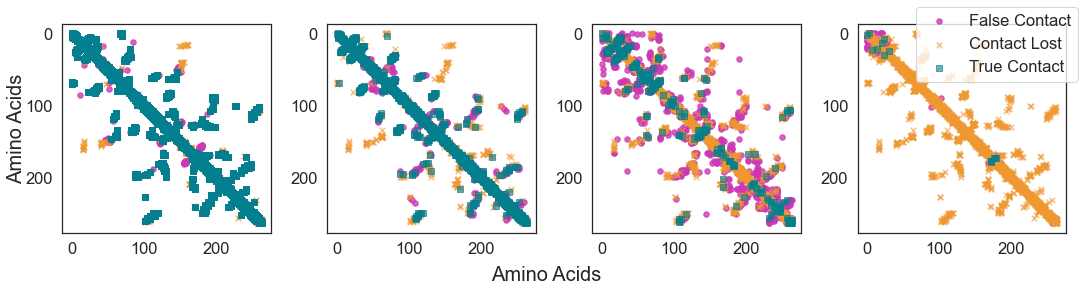

In [24]:
gt,alpha,esm,pcons,rand=get_cmaps('Q13882.npy','/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/results/",'Q13882.npy')

In [42]:
def comparision_contactMaps1(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure(figsize=(12, 12))

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    #Ground truth contact map from pdb structure
    G=gt

    # AlphaFold
    axs[0, 0].set_aspect('equal', adjustable='box')
    P=alpha
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    axs[0, 0].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    axs[0, 0].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.8,label="Contact Lost")
    axs[0, 0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=1,label="True Contact")

    axs[0, 0].set_title('AlphaFold2')


    axs[0, 1].set_aspect('equal', adjustable='box')
    # axs[1].title.set_text('Pconcs4')

    # Pconcs4
    P=pcons
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    axs[0, 1].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    axs[0, 1].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    axs[0, 1].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
    
    axs[0, 1].set_title('Pconsc4')


    axs[1, 0].set_aspect('equal', adjustable='box')
    
    
    # ESM
    P=esm
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    axs[1, 0].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    axs[1, 0].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    axs[1, 0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
    
    axs[1, 0].set_title('ESM')
    
    axs[1, 1].set_aspect('equal', adjustable='box')
 
    # Random
    P=rand
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)

    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    axs[1, 1].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    axs[1, 1].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    axs[1, 1].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
    
    axs[1, 1].set_title('Random')
    
    handles, labels = axs[1][1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right')
    
    axs[0][0].invert_yaxis()
    axs[0][1].invert_yaxis()
    axs[1][0].invert_yaxis()
    axs[1][1].invert_yaxis()
    
    axs[0][0].set_xticks(range(0,gt.shape[0], 100))
    axs[0][0].set_yticks(range(0,gt.shape[0], 100))
    axs[0][1].set_xticks(range(0,gt.shape[0], 100))
    axs[0][1].set_yticks(range(0,gt.shape[0], 100))
    axs[1][0].set_xticks(range(0,gt.shape[0], 100))
    axs[1][0].set_yticks(range(0,gt.shape[0], 100))
    axs[1][1].set_xticks(range(0,gt.shape[0], 100))
    axs[1][1].set_yticks(range(0,gt.shape[0], 100))
    
    fig.tight_layout()
    fig.supxlabel('Amino Acids',fontsize=25,ha='center',va='center')
    fig.supylabel('Amino Acids',fontsize=25,ha='center',va='center')
    final_result_path=results_path+file[:-4]+"_cmaps1_"+".pdf"
    final_result_path1=results_path+file[:-4]+"_cmaps1_"+".png"
    final_result_path2=results_path+file[:-4]+"_cmaps1_"+".svg"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path2, dpi=300, bbox_inches='tight')

<Figure size 864x864 with 0 Axes>

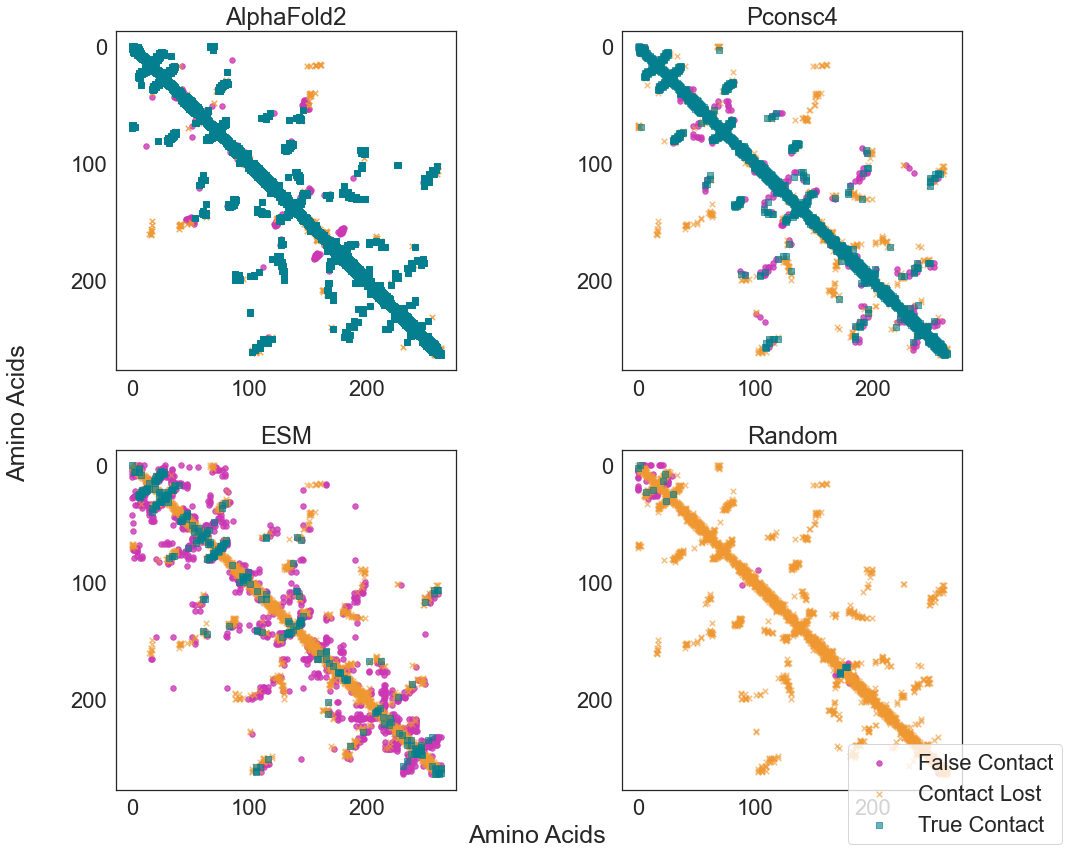

In [43]:
gt,alpha,esm,pcons,rand=get_cmaps('Q13882.npy','/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/')
comparision_contactMaps1(gt,alpha,esm,pcons,rand,"/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/results/",'Q13882.npy')

<Figure size 864x864 with 0 Axes>

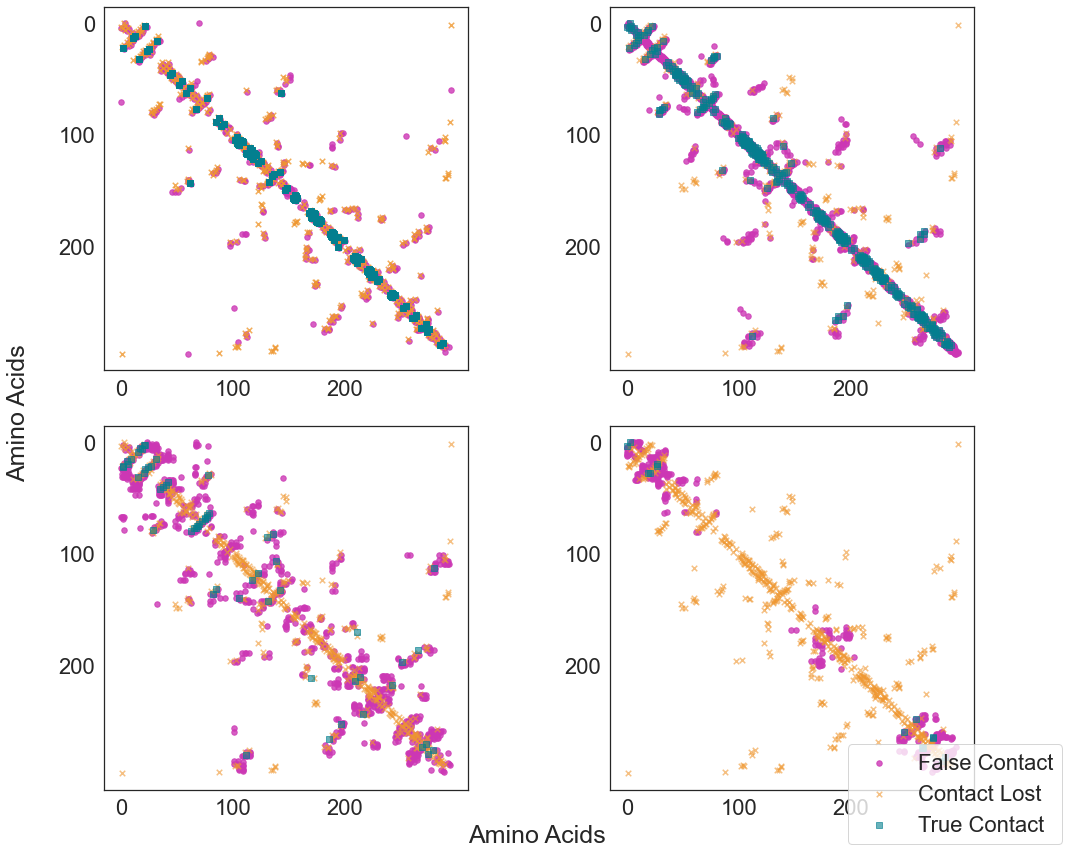

In [40]:

gt,alpha,esm,pcons,rand=get_cmaps('P06493.npy','/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/')
comparision_contactMaps1(gt,alpha,esm,pcons,rand,"/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/results/",'P06493.npy')